# Case 1. Heart Disease Classification

Jenni Hautojärvi   
Last edited: 4.2.2017   
Cognitive Systems for Health Technology Applications   
Helsinki Metropolia University of Applied Sciences

# 1. Objectives

In this assignment the main goal was how to learn read data and see what the data cointains from external sources using panda's. Goal was also learn how to build real neural network using Keras. Working neural network can predict and support diagnostic decision making. I also wanted to learn how to read and combine data from many different sources into a single data. 

In this assignment I used preprocessed data from 4 different sources.


# 2. Required libraries

In [290]:
# Importin libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

from pandas.plotting import scatter_matrix
from keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 3. Data description and preprocessing

In [328]:
# Location of the datasets

filename1 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename2 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename3 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename4 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

# Column names for the data
colnames = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','num']

# Read data to data frames
df1 = pd.read_csv(filename1,
                 names = colnames, 
                 na_values = '?')

df2 = pd.read_csv(filename2, 
                 names = colnames, 
                 na_values = '?')

df3 = pd.read_csv(filename3, 
                 names = colnames, 
                 na_values = '?')

df4 = pd.read_csv(filename4, 
                 names = colnames, 
                 na_values = '?')

# combine 4 datafiles
df = [df1, df2, df3, df4]
df = pd.concat(df)

# Print the shape of data and see size of it
df.shape

(920, 14)

In [329]:
# Statistics values
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


From the table we can see that average person in this data is a man, 53.5 years old and has some changes for having angiographic disease.

In [292]:
# Check how many NaN values are in the data
df.isnull().sum().sum()

1759

In [293]:
# Replace the missing values with column mean values and check the number of NaN values
df = df.where(~np.isnan(df), df.mean(), axis='columns')

df.isnull().sum().sum()

0

In [294]:
# Print the 5 row from data to check columns
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [295]:
# Output value: 0 = normal, 1 = heart disease
labels = (df['num'] > 0).values

In [296]:
# Scale the attributes between min and max
df2 = (df - df.min())/(df.max() - df.min())

# Select all attributes that were measured without angiography
columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope']

# Convert the data to numpy array
data = df2[columns].values

# Print the shape of data to figure out the number of columns is correct
data.shape

(920, 11)

In [297]:
# Check that the data is in the right format 
df2.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.520630,0.789130,0.750000,0.660662,0.330233,0.166265,0.302288,0.546096,0.389595,0.395317,0.385434,0.225458,0.521889,0.248913
std,0.192341,0.408148,0.310323,0.092219,0.180693,0.353831,0.402475,0.177032,0.473114,0.119747,0.252259,0.180556,0.329320,0.285673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.666667,0.600000,0.294776,0.000000,0.000000,0.422535,0.000000,0.295455,0.385434,0.225458,0.521889,0.000000
50%,0.530612,1.000000,1.000000,0.650000,0.366501,0.000000,0.000000,0.549296,0.000000,0.386364,0.385434,0.225458,0.521889,0.250000
75%,0.653061,1.000000,1.000000,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,0.500000,0.225458,0.750000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [318]:
# Split the data into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.36)

At first I used for Spliting the data the percent calculation (90% and 10% functions)  but then I noted that it took to the testing and training data from different sourses that I have combained. For example training data consisted of the first 3 sources and testing data consisted only from the 4. sources.

# 4. Modeling and compilation

In [319]:
# Define the architecture of the network

network = models.Sequential()
network.add(layers.Dense(7, activation = 'relu', input_shape=(11,)))
network.add(layers.Dense(3, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))

network.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

# 5. Training and Validation

In [320]:
# Train the network
# N is the number of epochs
N = 130 
history = network.fit(x_train, y_train, 
                      epochs = N, batch_size = 150, verbose=0,
                       validation_data = (x_test, y_test))

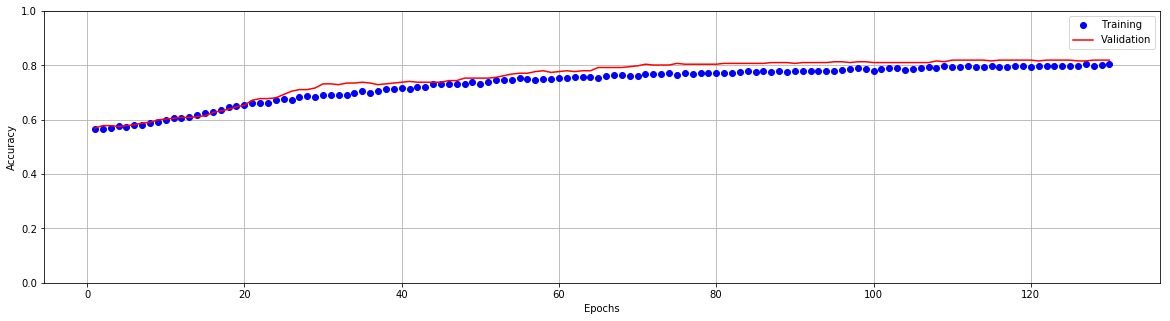

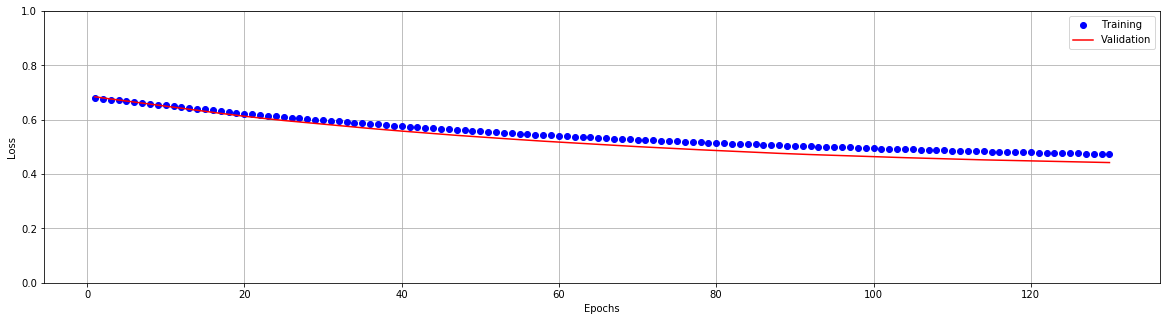

In [321]:
# Plot the results
epochs = range(1, N + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20,5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20,5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

From the plot we can see how the network is working and what we can expect to be the accuracy value.

# 6. Evalution

In [322]:
#Test the model

test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

332/332 [==============================] - 0s 81us/step
test acc: 0.819277108434


# 7. Results and Discussion

Confusion matrix, without normalization
[[111  35]
 [ 25 161]]
Normalized confusion matrix
[[ 0.76  0.24]
 [ 0.13  0.87]]


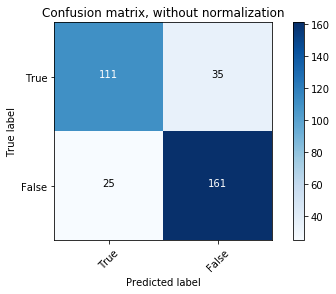

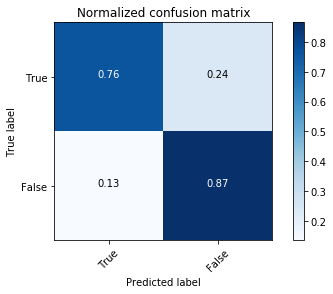

In [323]:
# Calculate predictions
y_pred = network.predict(x_test)

# Round predictions, data is easier to use
rounded = [round(x[0]) for x in y_pred]

# Create congusio matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rounded)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'False'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'False'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


From the confusion matrix we can see how many predicted values was right and wrong. And summing the number of true-true and fals-fals values and divideded it whit the number of testing values we get the same accurasity value when we tested the model as shown below.

In [342]:
# Calculate acc from matrix
matrix_acc = (cnf_matrix[0,0] + cnf_matrix[1,1])/(len(x_test))
print ('Matrix acc:', matrix_acc )
print('Test acc:', test_acc)

Matrix acc: 0.819277108434
Test acc: 0.819277108434


              age       sex        cp   tresbps      chol       fbs   restecg  \
age      1.000000  0.077562  0.224368  0.240417 -0.063911  0.256077  0.220539   
sex      0.077562  1.000000  0.306096 -0.006525 -0.235856  0.125121 -0.015842   
cp       0.224368  0.306096  1.000000  0.027662 -0.150754  0.064149  0.077484   
tresbps  0.240417 -0.006525  0.027662  1.000000  0.083386  0.145917  0.089054   
chol    -0.063911 -0.235856 -0.150754  0.083386  1.000000 -0.075601  0.068846   
fbs      0.256077  0.125121  0.064149  0.145917 -0.075601  1.000000  0.138232   
restecg  0.220539 -0.015842  0.077484  0.089054  0.068846  0.138232  1.000000   
thalach -0.397971 -0.234335 -0.329843 -0.065481  0.177112 -0.071428  0.023652   
exang    0.199595  0.250331  0.449527  0.124578  0.029554  0.018053  0.071020   
oldpeak  0.273811  0.172847  0.307085  0.147950 -0.001552  0.096928  0.142170   
slope    0.106881  0.162007  0.165100  0.052219 -0.054624  0.098852  0.010003   
Test     0.268651  0.431989 

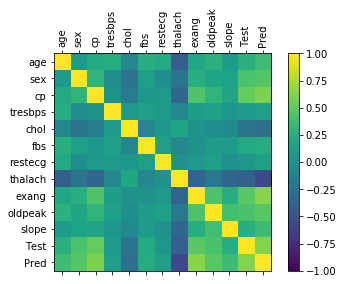

In [324]:
# Add information to original data for the correlation calculation
test = np.insert(x_test, 11, y_test, axis = 1)
pred = np.insert(test, 12, rounded, axis = 1)

# Add columns names
col = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'Test', 'Pred']

# Create data frame and calculated correlation and print table
test = pd.DataFrame(pred, columns = col)
corr = test.corr()

print (corr)

# Create a correlation graph
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col, rotation=90)
ax.set_yticklabels(col)
plt.show()

From the correlation table and matrix we can see that the tested and predicted values are not so different from each other.

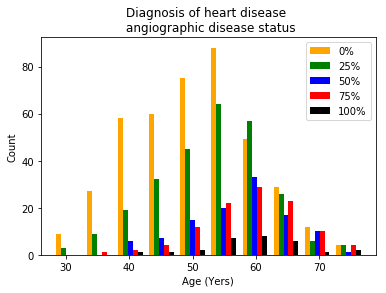

In [325]:
# Create table that combine age and num value
df3 = pd.DataFrame(df, columns=['age'])
df3['num'] = df2['num']

# Divided data basing on of the num value
age_num0 = df3[(df3['num'] == 0.0)]
#age_num0 = age_num0['age']
age_num1 = df3[(df3['num'] == 0.25)]
#age_num1 = age_num1['age']
age_num2 = df3[(df3['num'] == 0.50)]
#age_num2 = age_num2['age']
age_num3 = df3[(df3['num'] == 0.75)]
#age_num3 = age_num3['age']
age_num4 = df3[(df3['num'] == 1.00)]
#age_num4 = age_num4['age']

# Create histogram from values age and num
legend = ['0%', '25%', '50%','75%','100%']
plt.hist([age_num0['age'],age_num1['age'], age_num2['age'],age_num3['age'], age_num4['age'] ], color= ['orange', 'green','blue','red','black'])
plt.xlabel('Age (Yers)')
plt.ylabel('Count')
plt.legend(legend)
plt.title('Diagnosis of heart disease \n angiographic disease status')
plt.show()

From the histogram we can see how the angiographic disease status is divideding for different age groups.

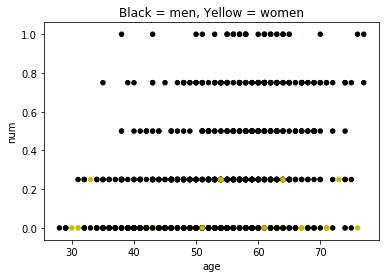

In [326]:
# Create colors using sex value
colors = np.where(df['sex']==0.0, 'y','k')

# Create scatterplot from age, num and sex values
df3.plot.scatter(x= 'age', y= 'num', c = colors)
plt.title('Black = man, Yellow = woman')
plt.show()

From the scattering we can see if the gender has influence on num value. But in this we can't make any conclusions because the number of mens and womens in the data is not the same. But we can see which num values men and women has.

This is not the best way to show data, but we can see that womens num values are not that high and age has no effect on that. That means also  we would need input more information from women to the network so that the network would predict and support diagnostic decision making for women better.

# 8. Conclusions

In this assignment I achieved the goals which I introduced at the beginng. The neural network is working great but if would start this assignment again I would combine data after I have splited the data to testing and training data. I don't know would it help but I think network could be litle bit more accuracy. And we need more data from womens.

This assignment was fun after little bit studying how the code works and what means what and what effects to what. Very good for first assignment.
